# Conducting Diwali Sales Analysis using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To avoid encoding error (ENC), using "unicode_escape"
df=pd.read_csv('C:\\Users\\hp\\OneDrive\Desktop\\Diwali Sales Data.csv',encoding = "unicode_escape")
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Preparing and cleaning the data for analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop blank/unrelated columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
#Recheck the datashape after dropping blank/unrelated columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
#check for null vaues
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#drop the null values and save it into the dataframe
df.dropna(inplace=True)

In [10]:
#Recheck the shape of dataframe
df.isnull().sum()
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [11]:
# Changing the data type of column 'Amount' from float to int
df['Amount']=df['Amount'].astype('int')

In [12]:
#check the data type of 'Amount' column after conversion
df['Amount'].dtypes

dtype('int32')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
#use describe method for specific column
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

# Based on Gender

Q#1:What insights can be derived from analyzing order placement data to identify potential patterns or trends in purchasing behavior across different genders?

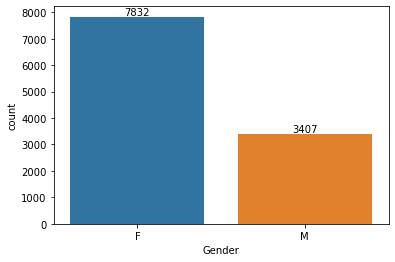

In [15]:
ax=sns.countplot(x='Gender',data=df)
for lbls in ax.containers:
    ax.bar_label(lbls)

In [16]:
pur_gender=df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
pur_gender

,Gender,Amount
0,F,74335853
1,M,31913276


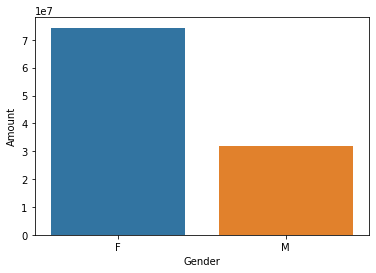

In [94]:
ax = sns.barplot(x = "Gender", y = "Amount", data = pur_gender)

# Based on Age

Q#2: which age group, considering gender, demonstrates a greater frequency of orders?

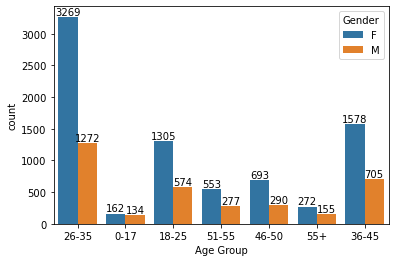

In [17]:
ax=sns.countplot(x='Age Group', data=df, hue='Gender')
for lbls in ax.containers:
    ax.bar_label(lbls)

Q#3: which age group, demonstrates a greater frequency of purchases?

In [18]:
pur_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
pur_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


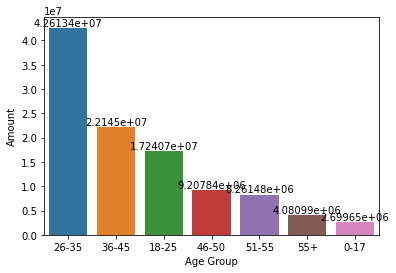

In [109]:
ax= sns.barplot(x='Age Group', y='Amount',data=pur_age,errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)

# Based on the States

Q#4: What is the  total number of orders originating from the highest-ranking (10) states?"






In [19]:
st=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
st

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


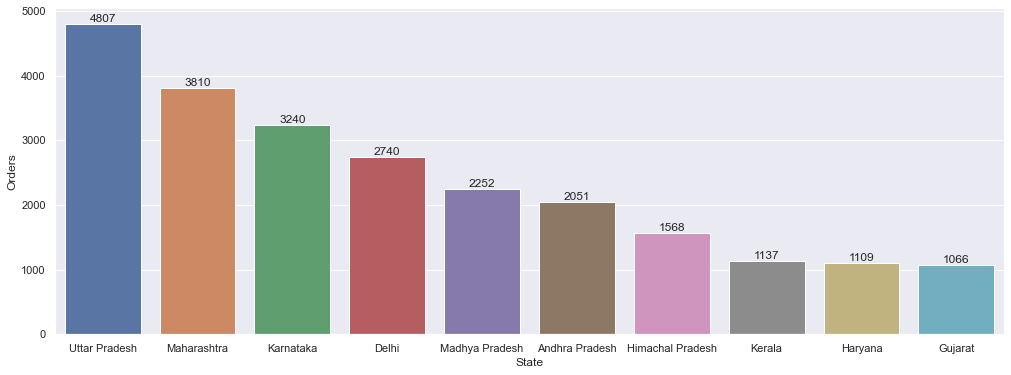

In [20]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.barplot(x = "State", y = "Orders", data = st)
for i in ax.containers:
    ax.bar_label(i,)

The graph above illustrates a substantial contribution to the majority of orders from states such as Uttar Pradesh, Maharashtra, and Karnataka.

Q#5: which state has spent more money on purchasing goods?

<AxesSubplot:xlabel='State', ylabel='Amount'>

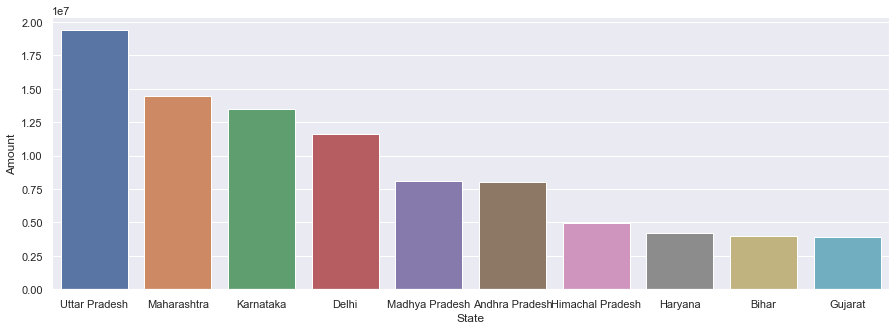

In [21]:
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From the above graph, we noticed that most of the sales are from the Uttar Pradesh, Maharashtra, and Karnataka.

# Based on the Marital Status

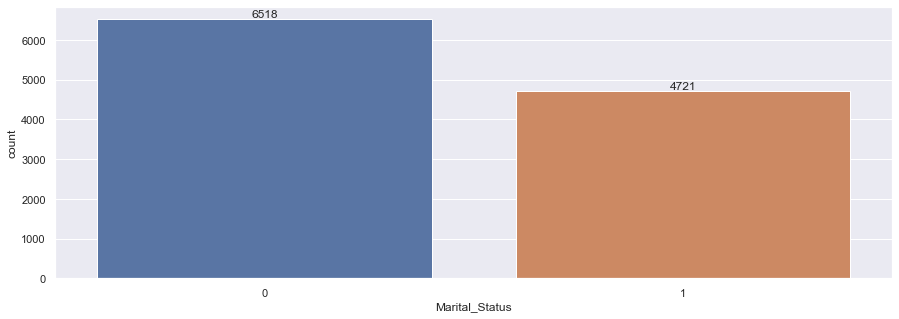

In [22]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

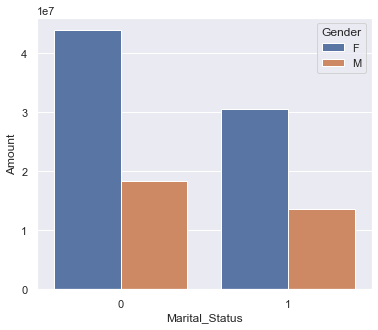

In [24]:
marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = marital_status, x = 'Marital_Status',y= 'Amount', hue='Gender')

we can see that, females (married) has purchasing more goods.

# Based on the Occupation

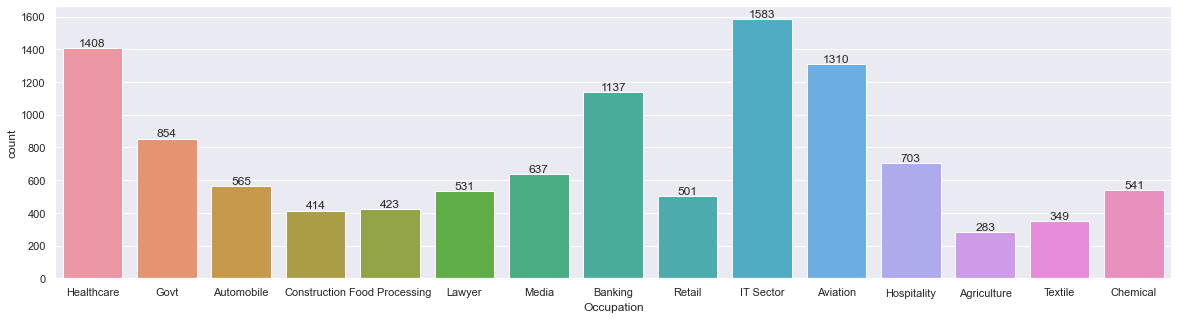

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

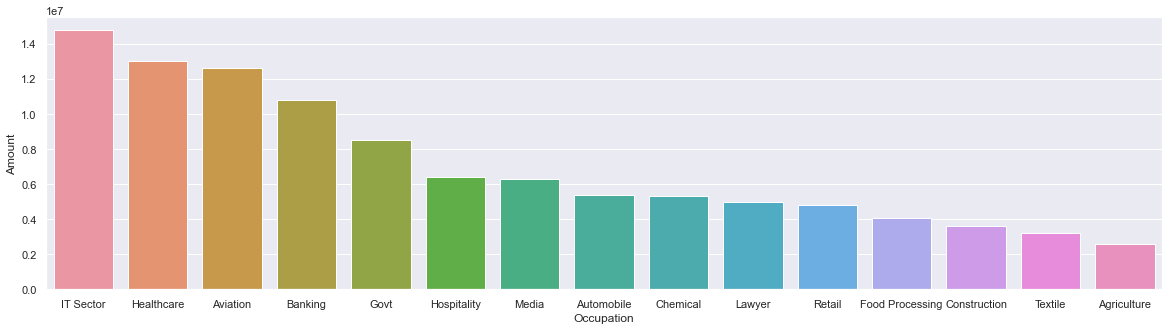

In [26]:
occup = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = occup, x = 'Occupation',y= 'Amount')

Based on the visual representation provided in the graphs above, it's evident that a significant portion of the buyers is employed within the IT, Healthcare, and Aviation sectors.

# Based on the Product

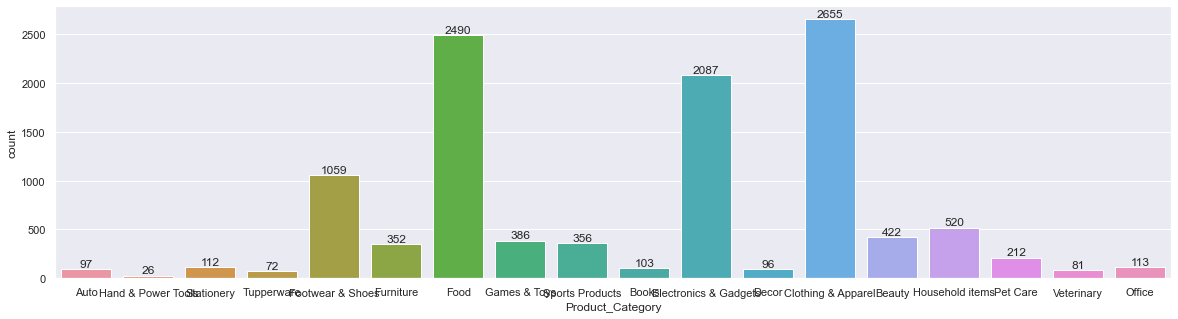

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

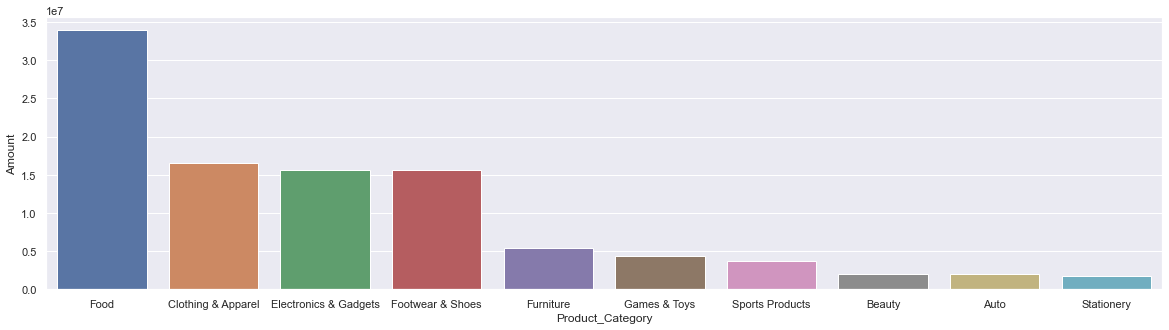

In [28]:
prod = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = prod, x = 'Product_Category',y= 'Amount')

it's apparent that a majority of the products sold belong to the Food, Clothing, and Electronics categories

# Conclusion

Women who are married and fall within the age group of 26-35 years, residing in the states of Uttar Pradesh (UP), Maharashtra, and Karnataka, and working in the IT, Healthcare, and Aviation industries, exhibit a higher inclination to purchase products within the Food, Clothing, and Electronics categories.